In [7]:
import pandas as pd
import seaborn as sns

In [9]:
df =pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\Datasets\titanic.csv")

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
import warnings 
warnings.filterwarnings("ignore")

In [17]:
df.Age = df.Age.fillna(method="pad")

In [27]:
df.Cabin = df.Cabin.fillna(method="bfill")

In [21]:
df.Fare = df.Fare.fillna(method="bfill")

In [23]:
df.duplicated().sum()

0

In [31]:
# drop columns
df.drop('PassengerId',axis=1,inplace=True)

In [33]:
df.drop('Ticket',axis=1,inplace=True)

In [52]:
df.dtypes

Survived      int64
Pclass        int64
Name          int32
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin         int32
Embarked      int64
dtype: object

In [43]:
df.Embarked.value_counts()

Embarked
0    270
1    102
2     46
Name: count, dtype: int64

In [39]:
def trans_mathscore(x):
    if x =="S":
        return 0
    if x =="C":
        return 1
    if x =="Q":
        return 2

In [41]:
df.Embarked =df.Embarked.apply(trans_mathscore)

<Axes: ylabel='Survived'>

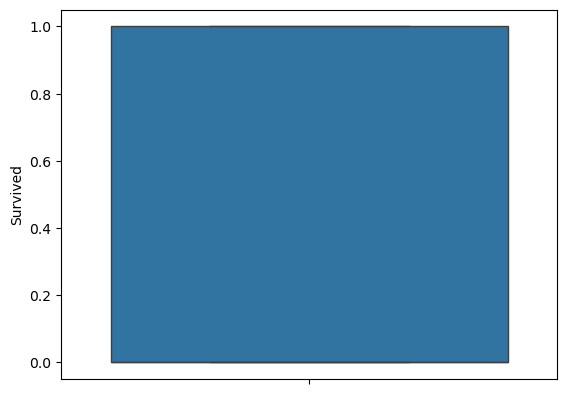

In [37]:
# Handle outliers using IQR
Q1 = df['Survived'].quantile(0.25)
Q3 = df['Survived'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[(df['Survived'] >= Q1 - 1.5 * IQR) & 
            (df['Survived'] <= Q3 + 1.5 * IQR)]
sns.boxplot(df['Survived'])

In [45]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [47]:
label_encoder = LabelEncoder()
df['Name'] = label_encoder.fit_transform(df['Name'])

In [49]:
label_encoder = LabelEncoder()
df['Cabin'] = label_encoder.fit_transform(df['Cabin'])

In [51]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling")

In [56]:
profile.to_notebook_iframe()

In [55]:
dependent_variable = 'Embarked'
independent_variables = df.columns.tolist()
independent_variables.remove(dependent_variable)
independent_variables

['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin']

In [57]:
dependent_variable

'Embarked'

In [59]:
x = df[independent_variables].values
y = df[dependent_variable].values

In [61]:
print(x)

[[  0.       3.     206.     ...   0.       7.8292  12.    ]
 [  1.       3.     403.     ...   0.       7.      12.    ]
 [  0.       2.     269.     ...   0.       9.6875  12.    ]
 ...
 [  0.       3.     332.     ...   0.       7.25    22.    ]
 [  0.       3.     384.     ...   0.       8.05    22.    ]
 [  0.       3.     302.     ...   1.      22.3583  22.    ]]


In [63]:
print(y)

[2 0 2 0 0 0 2 0 1 0 0 0 0 0 0 1 2 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 1 2 1 0 0 1 0 0 1 2 0 0 0 1 0 0 0 2 1 0 2 0 1 0 2 0 0 1
 1 1 0 0 0 2 1 0 0 0 2 1 2 0 2 0 0 0 0 0 1 0 0 0 0 0 1 0 2 0 1 0 2 2 0 0 1
 2 1 2 0 1 1 0 1 0 0 2 1 0 2 0 0 2 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 2 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 2 1
 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 2 0 1 0 0 1 2 0 1 0 0 0 0 0 0 0 2 0 1 0 1 0
 0 0 1 1 0 2 0 0 0 0 0 2 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 2 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 2 1 2 1 0 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 2 1 0 0 0
 1 1 0 0 0 1 0 0 2 0 0 0 0 0 0 1 0 2 1 2 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1
 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 2 0 0 1 0 0 1 0 1 0 1 1
 0 1 0 0 0 1 0 0 0 0 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 1 0 2 0 0 1 0 1 1 0
 1 2 0 2 2 0 0 1 0 0 1]


In [65]:
from sklearn.model_selection import train_test_split

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [69]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

In [71]:
random_forest = RandomForestClassifier( n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None)

In [73]:
random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [75]:
predicted= random_forest.predict(x_test)

In [77]:
predicted

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [81]:
confusion_matrix(y_test, predicted)

array([[48,  4,  0],
       [16,  7,  3],
       [ 3,  0,  3]], dtype=int64)

In [83]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81        52
           1       0.64      0.27      0.38        26
           2       0.50      0.50      0.50         6

    accuracy                           0.69        84
   macro avg       0.62      0.56      0.56        84
weighted avg       0.68      0.69      0.65        84



In [89]:
accuracy_score(y_test,predicted)

0.6904761904761905

In [130]:
print(cross_val_score(random_forest, y_test.reshape(-1,1), predicted.reshape(-1,1), cv = 5))

[0.64705882 0.82352941 0.76470588 0.70588235 0.8125    ]


In [132]:
import numpy as np
print(np.mean(cross_val_score(random_forest, y_test.reshape(-1,1), predicted.reshape(-1,1))))

0.7742647058823529


In [134]:
feature_list = list(df.columns[1:10])

In [136]:
feature_imp = pd.Series(random_forest.feature_importances_, index = feature_list).sort_values(ascending = False)
print(feature_imp)

Cabin       0.353759
Sex         0.182392
Embarked    0.142977
SibSp       0.140787
Name        0.065483
Fare        0.033546
Parch       0.033463
Pclass      0.026330
Age         0.021263
dtype: float64


In [ ]:
# Regression to compare the two models

In [89]:
dependent_variable = 'Age'
independent_variables = df.columns.tolist()
independent_variables.remove(dependent_variable)
independent_variables

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Embarked']

In [91]:
dependent_variable

'Age'

In [93]:
x = df[independent_variables].values
y = df[dependent_variable].values

In [95]:
print(x)

[[  0.       3.     206.     ...   7.8292  12.       2.    ]
 [  1.       3.     403.     ...   7.      12.       0.    ]
 [  0.       2.     269.     ...   9.6875  12.       2.    ]
 ...
 [  0.       3.     332.     ...   7.25    76.       0.    ]
 [  0.       3.     384.     ...   8.05    76.       0.    ]
 [  0.       3.     302.     ...  22.3583  76.       1.    ]]


In [97]:
print(y)

[34.5  47.   62.   27.   22.   14.   30.   26.   18.   21.   21.   46.
 23.   63.   47.   24.   35.   21.   27.   45.   55.    9.    9.   21.
 48.   50.   22.   22.5  41.   41.   50.   24.   33.   33.   30.   18.5
 18.5  21.   25.   25.   39.   39.   41.   30.   45.   25.   45.   45.
 60.   36.   24.   27.   20.   28.   28.   10.   35.   25.   25.   36.
 17.   32.   18.   22.   13.   13.   18.   47.   31.   60.   24.   21.
 29.   28.5  35.   32.5  32.5  55.   30.   24.    6.   67.   49.   49.
 49.   49.   27.   18.   18.    2.   22.   22.   27.   27.   25.   25.
 76.   29.   20.   33.   43.   27.   27.   26.   16.   28.   21.   21.
 21.   18.5  41.   41.   36.   18.5  63.   18.   18.    1.   36.   29.
 12.   12.   35.   28.   28.   17.   22.   22.   42.   24.   32.   53.
 53.   53.   43.   24.   26.5  26.   23.   40.   10.   33.   61.   28.
 42.   31.   31.   22.   22.   30.   23.   23.   60.5  36.   13.   24.
 29.   23.   42.   26.   26.    7.   26.   26.   41.   26.   48.   18.
 18. 

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [87]:
from sklearn.preprocessing import StandardScaler

In [89]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test =scaler.transform(x_test)

In [83]:
from sklearn.linear_model import Ridge

In [119]:
ridge_reg = Ridge(alpha=1.0,
    fit_intercept=True,
    copy_X=True,
    max_iter=None,
    tol=0.0001,
    solver='auto',
    positive=False,
    random_state=None)

In [121]:
ridge_reg.fit(x_train, y_train)

Ridge()

In [123]:
predicted = ridge_reg.predict(x_test)
print(predicted)

[26.47365968 31.57896425 38.93217831 25.53407717 26.25255433 37.57810746
 26.71450993 26.6786585  40.52275864 26.70144959 23.8419768  39.926331
 22.95171416 37.50581893 31.92632255 26.32339907 39.89145114 35.96715812
 24.14285599 32.58735824 25.3744389  31.72506018 35.20839444 32.37484489
 40.44408394 23.82892368 37.85214278 16.4077585  38.2768347  33.63948629
 29.8450371  24.31419851 42.725742   26.35930967 35.84122025 23.74297988
 23.7524172  32.25044627 23.05303827 24.44380768 31.67818561 31.53838697
 24.34534636 26.53022397 39.60749338 26.59971834 26.64927699 32.5063221
 35.33561163 29.65314246 38.6962759  31.08006274 32.29069615 26.6008518
 33.04749459 35.44290522 26.75817757 43.2534872  26.57222539 32.28523931
 18.97371552 26.39160553 25.84781643 27.30404028 26.46912902 39.98668035
 38.49683367 26.44125657 32.41184916 23.44692986 36.34188942 36.73910827
 37.02342629 29.33549995 26.14612949 26.49568766 27.69063229 21.47531151
 27.2904127  24.07654503 29.99073043 37.27724749 22.836

In [105]:
from sklearn.metrics import r2_score

In [125]:
r2_score(y_test,predicted)

0.15291075130814158

In [127]:
ridge_reg.intercept_

30.143473053892215

In [131]:
y_test = pd.DataFrame(y_test)
predicted = pd.DataFrame(predicted)
output = pd.concat({'Actual':y_test, 'Predicted':predicted, 'Difference':y_test - predicted}, axis = 1)
output 

,Actual,Predicted,Difference
,0,0,0
0,28.0,26.473660,1.526340
1,48.0,31.578964,16.421036
2,55.0,38.932178,16.067822
3,25.0,25.534077,-0.534077
4,27.0,26.252554,0.747446
...,...,...,...
79,22.0,24.076545,-2.076545
80,13.0,29.990730,-16.990730
81,60.0,37.277247,22.722753


In [ ]:
# DEPLOYNG THE RANDOM FOREST MODEL AND CREATION OF DASHBORD WITH STREAMLIT

In [91]:
import pickle

# Save the model
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(random_forest, file)

# Load the model
with open("random_forest_model.pkl", "rb") as file:
    model = pickle.load(file)

In [93]:
import streamlit as st
import numpy as np

# Load the saved model
with open("random_forest_model.pkl", "rb") as file:
    model = pickle.load(file)

# Dashboard creation
st.title("Random Forest Prediction Dashboard")

# Input fields
feature1 = st.number_input("Enter feature 1 value:")
feature2 = st.number_input("Enter feature 2 value:")
feature3 = st.number_input("Enter feature 3 value:")
feature4 = st.number_input("Enter feature 4 value:")

# Prediction button
if st.button("Predict"):
    features = np.array([[feature1, feature2, feature3, feature4]])
    prediction = model.predict(features)
    st.write(f"Prediction: {prediction[0]}")

2025-04-18 21:52:31.339 
  command:

    streamlit run C:\Users\DELL\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-18 21:52:31.339 Session state does not function when running a script without `streamlit run`
